In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Walmart_dataset.csv', encoding='latin1')

In [3]:
data.shape

(541909, 8)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#checking for null value
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'].str.split().str.get(0))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [10]:
#dropping customer_Id which are blank
data.dropna(subset=['CustomerID'], inplace= True)
data['CustomerID'] = data['CustomerID'].astype(int)

In [11]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [13]:
data.duplicated().sum()

5226

In [14]:
data.drop_duplicates(inplace= True)

In [15]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401603.000000,401603.000000,401603.000000
mean,12.183298,3.474067,15281.162093
std,250.283348,69.764122,1714.008032
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


- There are qty which are negative. Assuming the return. We will remove the qty

In [16]:
data = data[(data['Quantity'] > 0)]
data = data[data['UnitPrice'] > 0]

In [17]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,392691.000000,392691.000000,392691.000000
mean,13.119730,3.125917,15287.845186
std,180.493061,22.241864,1713.541531
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
rfm_data = data[['CustomerID','InvoiceDate','InvoiceNo', 'UnitPrice','Quantity']]

In [19]:
#making the rfm_model to check the customer reliability

try:
    rfm_data['Total_Price'] = rfm_data['UnitPrice'] * rfm_data['Quantity']
    rfm_data.drop(['UnitPrice', 'Quantity'], axis = 1, inplace = True)
except Exception as e:
    print(f"Cols already deleted: {e}")

In [20]:
rfm_data

,CustomerID,InvoiceDate,InvoiceNo,Total_Price
0,17850,2010-12-01,536365,15.30
1,17850,2010-12-01,536365,20.34
2,17850,2010-12-01,536365,22.00
3,17850,2010-12-01,536365,20.34
4,17850,2010-12-01,536365,20.34
...,...,...,...,...
541904,12680,2011-12-09,581587,10.20
541905,12680,2011-12-09,581587,12.60
541906,12680,2011-12-09,581587,16.60
541907,12680,2011-12-09,581587,16.60


Text(0.5, 1.0, 'Amount Boxplot')

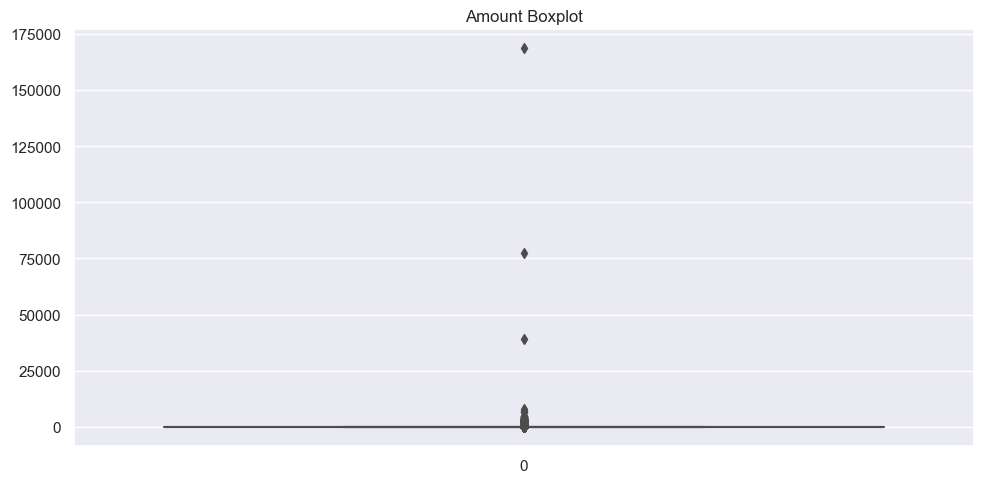

In [21]:
plt.figure(figsize=(10,5),layout = 'tight')

sns.boxplot(rfm_data['Total_Price'])
plt.title("Amount Boxplot")

In [22]:
rfm_data.describe()

,CustomerID,Total_Price
count,392691.000000,392691.000000
mean,15287.845186,22.631547
std,1713.541531,311.099619
min,12346.000000,0.001000
25%,13955.000000,4.950000
50%,15150.000000,12.450000
75%,16791.000000,19.800000
max,18287.000000,168469.600000


In [23]:
#checking outliers on the Quantity and Amount column
def outliers(df):
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    return upper, lower

In [24]:
upper, lower = outliers(rfm_data['Total_Price'])

In [25]:
lower

-17.325

In [26]:
# rfm_data['Total_Price'] = np.where(rfm_data['Total_Price'] >upper,upper,np.where(rfm_data['Total_Price']<lower,
#                                                                                          lower,rfm_data['Total_Price']))

In [27]:
rfm_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Total_Price
0,17850,2010-12-01,536365,15.30
1,17850,2010-12-01,536365,20.34
2,17850,2010-12-01,536365,22.00
3,17850,2010-12-01,536365,20.34
4,17850,2010-12-01,536365,20.34


In [28]:
max_date = rfm_data['InvoiceDate'].max()

In [29]:
rfm_data_grouped = rfm_data.groupby('CustomerID').agg(Recency=('InvoiceDate', lambda x: (max_date - x.max()).days),
                                                      Frequency=('InvoiceNo', 'nunique'),
                                                      Monetary=('Total_Price', np.sum),
                                                     Cycle=('InvoiceDate', lambda x: (x.max() - x.min()).days),
                                                     )

In [30]:
rfm_data_grouped['Avg_Spent_per_visit'] = rfm_data_grouped['Monetary'] / rfm_data_grouped['Frequency']
rfm_data_grouped['inpurchase_time'] = rfm_data_grouped['Cycle'] // rfm_data_grouped['Frequency']

In [31]:
rfm_data_grouped

,Recency,Frequency,Monetary,Cycle,Avg_Spent_per_visit,inpurchase_time
CustomerID,,,,,,
12346,325,1,77183.60,0,77183.600000,0
12347,2,7,4310.00,365,615.714286,52
12348,75,4,1797.24,283,449.310000,70
12349,18,1,1757.55,0,1757.550000,0
12350,310,1,334.40,0,334.400000,0
...,...,...,...,...,...,...
18280,277,1,180.60,0,180.600000,0
18281,180,1,80.82,0,80.820000,0
18282,7,2,178.05,119,89.025000,59


In [32]:
#checking valuecount of the frequency for top 20
rfm_data_grouped['Frequency'].value_counts()[:20]

1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
11      52
12      45
13      30
15      28
14      20
17      18
18      14
19      12
20      12
21      11
Name: Frequency, dtype: int64

- Most of the customer have visited the shop only once.

In [33]:
# we will consider only those customer who have visited more than once
# rfm_data_grouped = rfm_data_grouped[rfm_data_grouped['Frequency'] > 1]
# rfm_data_grouped.shape

In [34]:
rfm_data_grouped

,Recency,Frequency,Monetary,Cycle,Avg_Spent_per_visit,inpurchase_time
CustomerID,,,,,,
12346,325,1,77183.60,0,77183.600000,0
12347,2,7,4310.00,365,615.714286,52
12348,75,4,1797.24,283,449.310000,70
12349,18,1,1757.55,0,1757.550000,0
12350,310,1,334.40,0,334.400000,0
...,...,...,...,...,...,...
18280,277,1,180.60,0,180.600000,0
18281,180,1,80.82,0,80.820000,0
18282,7,2,178.05,119,89.025000,59


## Preparing the clustering model

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data_grouped)

Text(0, 0.5, 'Clusters')

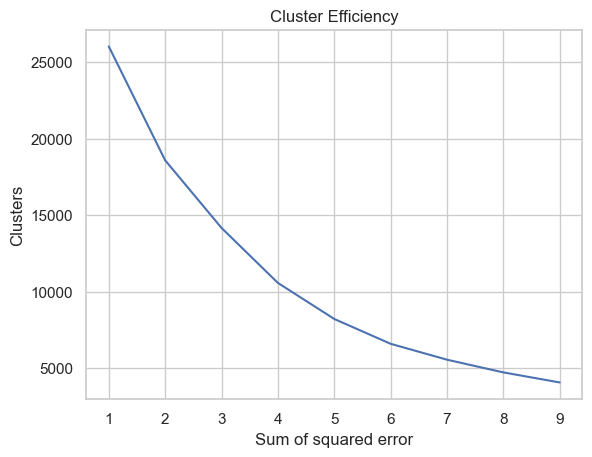

In [37]:
sse = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i, max_iter= 100, random_state= 42)
    kmean.fit(rfm_scaled)
    sse.append(kmean.inertia_)
    
sns.set_style('whitegrid')
sns.lineplot(x = range(1,10), y= sse)
plt.title("Cluster Efficiency")
plt.xlabel("Sum of squared error")
plt.ylabel("Clusters")

In [38]:
# we can consider 3 or 7 basis higher silhouette_score

In [39]:
for i in range(3,8):
    kmeans = KMeans(n_clusters= i, max_iter= 100, random_state= 42,)
    kmeans.fit(rfm_scaled)
    clusteres = kmeans.predict(rfm_scaled)

    score = silhouette_score(rfm_scaled, clusteres)
    print(f"silhouette_score for {i} cluster: {score}")

silhouette_score for 3 cluster: 0.44083820927252615
silhouette_score for 4 cluster: 0.44461830299247274
silhouette_score for 5 cluster: 0.4394929097744874
silhouette_score for 6 cluster: 0.43785278251852816
silhouette_score for 7 cluster: 0.43748487512242623


In [40]:
#we will consider 4 cluster model

In [41]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(rfm_scaled)
rfm_data_grouped['Score'] = kmeans.labels_

In [42]:
rfm_data_grouped.head()

,Recency,Frequency,Monetary,Cycle,Avg_Spent_per_visit,inpurchase_time,Score
CustomerID,,,,,,,
12346,325,1,77183.60,0,77183.600000,0,3
12347,2,7,4310.00,365,615.714286,52,1
12348,75,4,1797.24,283,449.310000,70,1
12349,18,1,1757.55,0,1757.550000,0,0
12350,310,1,334.40,0,334.400000,0,0


In [43]:
def cluster_plot(data, score):
    cols = data.columns
    if len(cols) > 4:
        cols = data.columns[:len(cols)-2]
    else:
        cols = data.columns[:-1]
    plt.figure(figsize=(10,15), layout = 'tight')
    for i in range(len(cols)):
        plt.subplot(4,2,i+1)
        if i<len(cols)-1:
            sns.scatterplot(data=data, hue= score, x= cols[i], y= cols[i+1], palette='rainbow')

        else:
            sns.scatterplot(data=data, hue= score, x= cols[0], y= cols[2], palette='rainbow')
    plt.show()

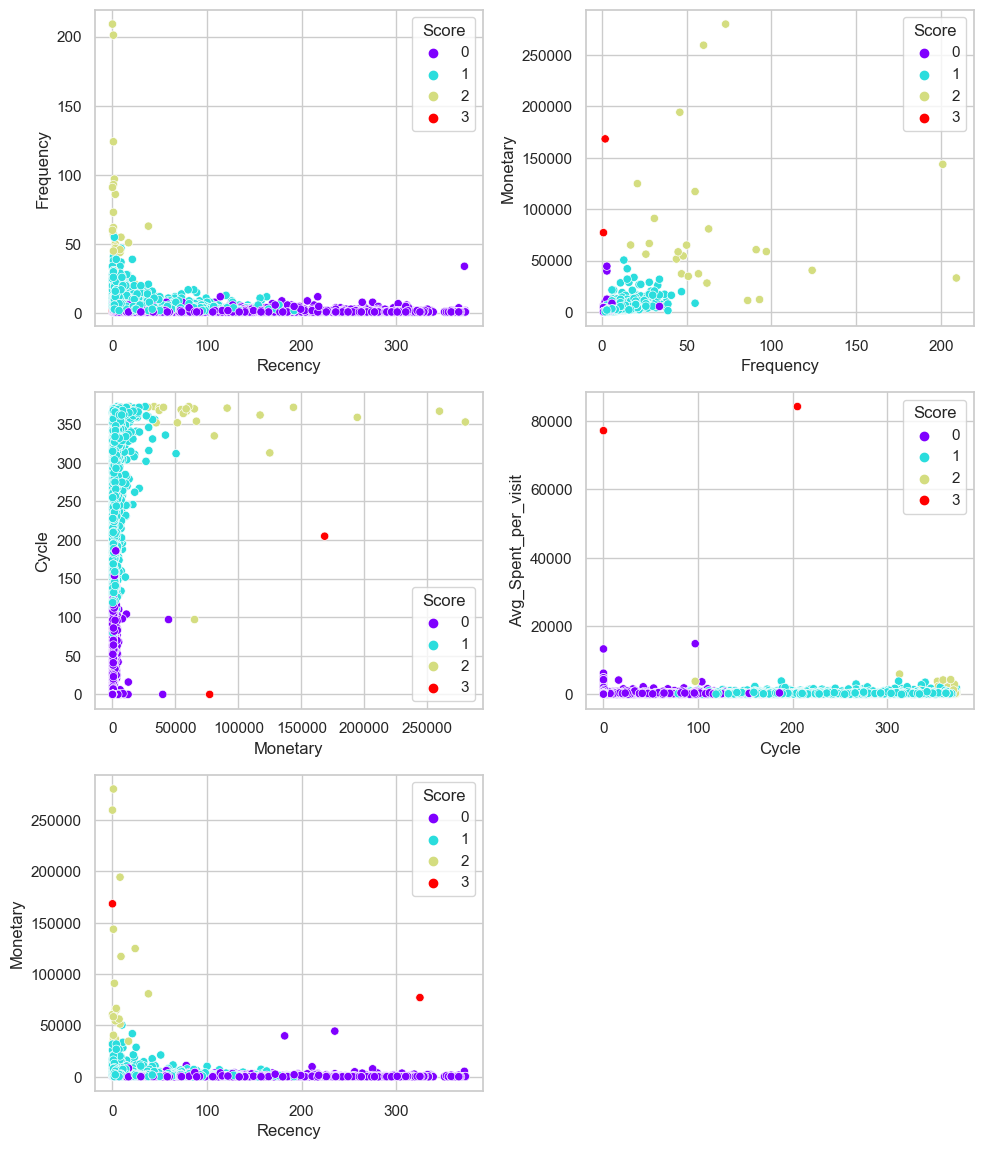

In [44]:
cluster_plot(rfm_data_grouped,'Score')

In [45]:
rfm_data_grouped['Score'].value_counts()

0    2305
1    2006
2      25
3       2
Name: Score, dtype: int64

## Making recommendation system

In [49]:
rfm_data_grouped.reset_index(inplace= True)

In [50]:
data_score = pd.merge(left=data, right=rfm_data_grouped[['CustomerID','Score']], on='CustomerID')

In [51]:
data_score.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,0


In [52]:
#we will consider only those customer where rating is more than 2
data_score = data_score[data_score['Score']>=2]

In [57]:
data_score['Price'] = data_score['UnitPrice']*data_score['Quantity']

In [53]:
data_score.shape

(40611, 9)

In [55]:
data_score['Description'].nunique()

3143

In [56]:
data_score['StockCode'].nunique()

3013

In [64]:
#the stock code are not unique as description and stok code unique count is different. 
#we will create a group basis description to check the Number of time purchased and amount expended

product_group = data_score.groupby('Description').agg(Total_Cost = ('Price', np.sum),
                                     num_Purchase = ('InvoiceNo', np.size)).reset_index()

In [65]:
product_group

,Description,Total_Cost,num_Purchase
0,4 PURPLE FLOCK DINNER CANDLES,17.85,2
1,50'S CHRISTMAS GIFT BAG LARGE,531.00,4
2,DOLLY GIRL BEAKER,1574.50,11
3,I LOVE LONDON MINI BACKPACK,470.45,7
4,I LOVE LONDON MINI RUCKSACK,4.15,1
...,...,...,...
3138,ZINC T-LIGHT HOLDER STAR LARGE,153.45,12
3139,ZINC T-LIGHT HOLDER STARS SMALL,517.00,24
3140,ZINC TOP 2 DOOR WOODEN SHELF,33.90,1
3141,ZINC WILLIE WINKIE CANDLE STICK,376.65,26


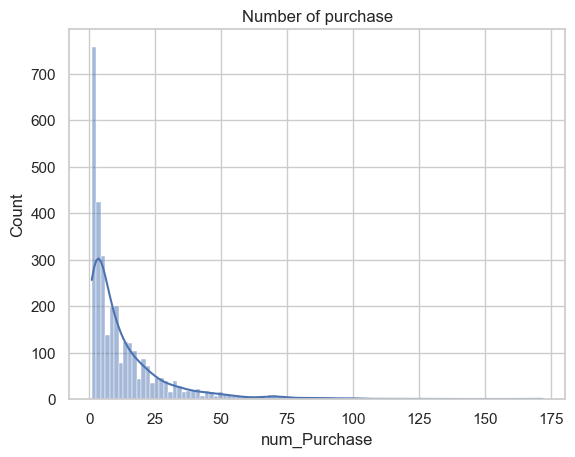

In [66]:
sns.histplot(product_group['num_Purchase'], bins = 100, kde= True)
plt.title("Number of purchase")
plt.show()

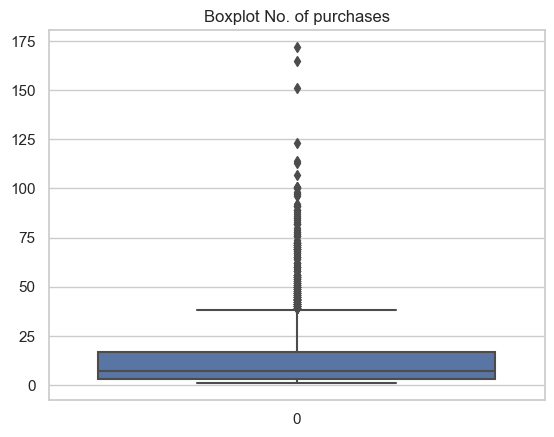

In [67]:
sns.boxplot(product_group['num_Purchase'])
plt.title("Boxplot No. of purchases")
plt.show()

In [68]:
product_group.describe()

,Total_Cost,num_Purchase
count,3143.000000,3143.000000
mean,734.540767,12.921094
std,3791.447868,16.370807
min,0.190000,1.000000
25%,31.940000,3.000000
50%,133.800000,7.000000
75%,485.220000,17.000000
max,168469.600000,172.000000


In [92]:
#we will consider the prduct which was bought atleast 50 times
product_lst = product_group[(product_group['num_Purchase'] > 50) & (product_group['Total_Cost'] > 1000)]['Description'].tolist()

In [93]:
print(f"Unique product to consider: {len(product_lst)}")

Unique product to consider: 100


In [94]:
final_df = data_score[data_score['Description'].isin(product_lst)].reset_index(drop = True)

In [95]:
final_df.shape

(7559, 10)

In [96]:
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Score,Price
0,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01,4.25,15311,United Kingdom,2,97.75
1,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01,1.95,15311,United Kingdom,2,19.50
2,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2010-12-01,1.25,15311,United Kingdom,2,7.50
3,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01,1.95,15311,United Kingdom,2,1.95
4,536381,21175,GIN + TONIC DIET METAL SIGN,2,2010-12-01,2.10,15311,United Kingdom,2,4.20


In [97]:
final_df = final_df[['Description','CustomerID']]

In [102]:
final_df.shape

(7559, 2)

In [98]:
length = []
for i in range(final_df.shape[0]):
    length.append(len(final_df.loc[i,'Description'].strip().split()))

print("Max sentance length: ", max(length))

Max sentance length:  7


In [99]:
#making a pivot table for the count of the customer ID who have bought the product
pivot = pd.pivot_table(data= final_df, index='Description', columns='CustomerID', aggfunc= np.size, fill_value= 0)

In [101]:
pivot.shape

(100, 25)

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(pivot)
similarity_score

array([[1.        , 0.85597624, 0.65174499, ..., 0.26635526, 0.72177633,
        0.54930716],
       [0.85597624, 1.        , 0.67798139, ..., 0.35251324, 0.64298935,
        0.69723949],
       [0.65174499, 0.67798139, 1.        , ..., 0.28629781, 0.70081908,
        0.70462694],
       ...,
       [0.26635526, 0.35251324, 0.28629781, ..., 1.        , 0.30466073,
        0.36066332],
       [0.72177633, 0.64298935, 0.70081908, ..., 0.30466073, 1.        ,
        0.70071079],
       [0.54930716, 0.69723949, 0.70462694, ..., 0.36066332, 0.70071079,
        1.        ]])

In [143]:
def recommender(prod, num_recomendation = 5):
    #product index
    if prod in pivot.index:
        index = np.where(pivot.index == prod)[0][0]
        sim_score = sorted(list(enumerate(similarity_score[index])), key= (lambda x: x[1]), reverse= True)[1:num_recomendation+1]
        top_product = [i[0] for i in sim_score]

        for i in top_product:
            print((pivot.index[i]).title())
    else:
        print(f"{prod} not in recommendation list")

In [144]:
for i in range(1,10):
    prod = final_df.sample(1)['Description'].values[0]
    print(f"{str(i)} Searched Product: ", prod.title())
    print("=="*12)
    recommender(prod)
    print("=="*12)
    

1 Searched Product:  Spotty Bunting
Pack Of 20 Napkins Pantry Design
Chocolate Hot Water Bottle
Set Of 3 Cake Tins Pantry Design 
Lunch Bag Alphabet Design
Party Bunting
2 Searched Product:  Lunch Bag Apple Design
Lunch Bag Pink Polkadot
Lunch Bag Red Retrospot
Red Retrospot Charlotte Bag
Lunch Bag  Black Skull.
Red Stripe Ceramic Drawer Knob
3 Searched Product:  Jumbo Bag Apples
Jumbo Bag Alphabet
Jumbo Bag Red Retrospot
Jumbo Bag Owls
Jumbo Bag Spaceboy Design
Jumbo Bag Vintage Leaf
4 Searched Product:  Set Of 3 Wooden Heart Decorations
Pink Cream Felt Craft Trinket Box 
Gardeners Kneeling Pad Cup Of Tea 
Gardeners Kneeling Pad Keep Calm 
Charlotte Bag Pink Polkadot
Gingham Heart Decoration
5 Searched Product:  Jumbo Bag Red Retrospot
Jumbo Bag Pink Polkadot
Jumbo Bag Strawberry
Jumbo  Bag Baroque Black White
Jumbo Bag Owls
Jumbo Bag Scandinavian Blue Paisley
6 Searched Product:  Lunch Bag  Black Skull.
Lunch Bag Cars Blue
Lunch Bag Pink Polkadot
Lunch Bag Spaceboy Design 
Lunch Bag 